In [225]:
import numpy as np
import pandas as pd
import seaborn as sns

In [226]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [227]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Output/Target variable/ dependent - Exited

In [228]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [230]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [231]:
df.duplicated().sum()

0

In [232]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [233]:
df=df.drop(['RowNumber','CustomerId',	'Surname'] ,axis=1)

In [234]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Now, we need tp covert categorical columns to numerical. This can be done by dummies method or LableEncoder

In [235]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()

#df['Geography'] = label_encoder.fit_transform(df['Geography'])

#df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [236]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [237]:
#sns.pairplot(df)

In [238]:
df=pd.get_dummies(df,drop_first=True)

In [239]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [240]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [241]:
import seaborn as sns

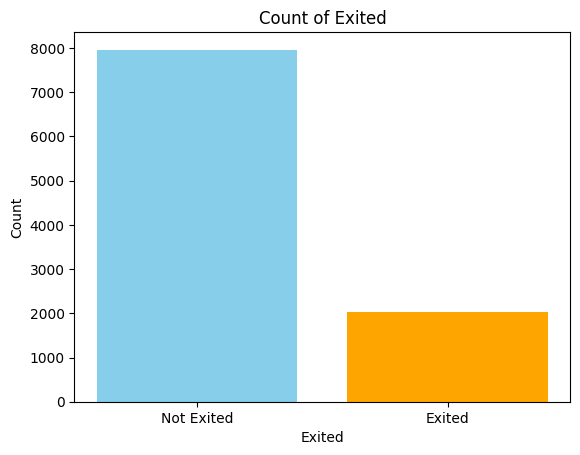

In [242]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
exited_counts = df['Exited'].value_counts()

# Plotting using matplotlib
plt.bar(exited_counts.index, exited_counts.values, color=['skyblue', 'orange'])
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Exited')
plt.xticks(exited_counts.index, labels=['Not Exited', 'Exited'])
plt.show()


In [243]:
y=df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [244]:
X=df.drop('Exited',axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


SMOTE (Synthetic Minority Over-sampling Technique)
is a method used to address imbalanced datasets by generating synthetic samples for the minority class. It oversamples the minority class by creating synthetic instances between existing minority class instances. This helps balance the class distribution and improves the model's ability to learn from the minority class.

In [245]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)

In [246]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [247]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=50)

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
sc=StandardScaler()

In [250]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [251]:
X_train

array([[ 0.7800781 , -0.09857692,  0.06757467, ..., -0.57312054,
        -0.46438008, -0.84551822],
       [-0.78158849,  0.20115338,  0.43469677, ..., -0.57312054,
         2.15340849,  1.18270662],
       [ 0.57258394, -0.39830722, -0.66666953, ..., -0.57312054,
        -0.46438008, -0.84551822],
       ...,
       [-1.06552786,  0.10124328, -1.03379163, ..., -0.57312054,
        -0.46438008, -0.84551822],
       [ 1.50084729, -0.39830722,  0.80181888, ..., -0.57312054,
        -0.46438008,  1.18270662],
       [-0.45396613,  1.10034429,  0.06757467, ..., -0.57312054,
        -0.46438008, -0.84551822]])

In [252]:
X_test

array([[ 0.38693127, -1.49731833, -1.03379163, ...,  1.74483364,
        -0.46438008, -0.84551822],
       [ 0.32140679,  1.89962509,  1.90318518, ..., -0.57312054,
        -0.46438008, -0.84551822],
       [-0.31199644, -0.89785772,  0.80181888, ..., -0.57312054,
        -0.46438008,  1.18270662],
       ...,
       [ 0.27772381,  1.59989479, -0.29954743, ..., -0.57312054,
         2.15340849, -0.84551822],
       [-0.17002675,  0.20115338, -0.66666953, ..., -0.57312054,
        -0.46438008, -0.84551822],
       [-0.69422252, -0.29839712,  0.06757467, ..., -0.57312054,
        -0.46438008, -0.84551822]])

In [253]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()


In [254]:
log.fit(X_train,y_train)

LogisticRegression()

In [255]:
y_prediction=log.predict(X_test)

In [256]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.7614563716258631

On imbalanced data, accuracy may be misleading as it doesn't account for the class distribution. Use metrics like precision, recall, and F1-score to assess model performance, especially for minority classes.

In [257]:
from sklearn.metrics import precision_score, f1_score,recall_score
print(precision_score(y_test,y_prediction))
print(f1_score(y_test,y_prediction))
print(recall_score(y_test,y_prediction))

0.761723700887199
0.7597977243994943
0.7578814627994955


earlier
accuracy=0.80

precision=0.58914

f1=0.28358

recal=0.186

In [258]:
from sklearn import svm
svm=svm.SVC()

In [259]:
svm.fit(X_train,y_train)

SVC()

In [260]:
y_prediction2=svm.predict(X_test)

In [261]:
accuracy_score(y_test,y_prediction2)

0.8242310106716887

In [262]:
print(precision_score(y_test,y_prediction2))
print(f1_score(y_test,y_prediction2))
print(recall_score(y_test,y_prediction2))

0.8267515923566879
0.8225602027883396
0.8184110970996217


In [263]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [264]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [265]:
y_prediction3=dc.predict(X_test)

In [266]:
accuracy_score(y_test,y_prediction3)

0.7972379158819837

In [267]:
print(precision_score(y_test,y_prediction3))
print(f1_score(y_test,y_prediction3))
print(recall_score(y_test,y_prediction3))

0.7841596130592503
0.8006172839506173
0.817780580075662


In [268]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [269]:
rf.fit(X_train,y_train)


RandomForestClassifier()

In [270]:
y_prediction4=rf.predict(X_test)

In [271]:
accuracy_score(y_test,y_prediction4)

0.8584431889516635

In [272]:
print(precision_score(y_test,y_prediction4))
print(f1_score(y_test,y_prediction4))
print(recall_score(y_test,y_prediction4))

0.8612348822406111
0.8571428571428572
0.8530895334174022


In [273]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [274]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [275]:
y_prediction5=dc.predict(X_test)

In [276]:
accuracy_score(y_test,y_prediction5)

0.7972379158819837

In [277]:
print(precision_score(y_test,y_prediction5))
print(f1_score(y_test,y_prediction5))
print(recall_score(y_test,y_prediction5))

0.7841596130592503
0.8006172839506173
0.817780580075662


In [278]:
final_result=pd.DataFrame({'Models':['LR','SVC','DC','RF','GBC'],'ACC':[accuracy_score(y_test,y_prediction),
                                                                         accuracy_score(y_test,y_prediction2),
                                                                         accuracy_score(y_test,y_prediction3),
                                                                         accuracy_score(y_test,y_prediction4),
                                                                         accuracy_score(y_test,y_prediction5)]})

<Axes: xlabel='Models', ylabel='ACC'>

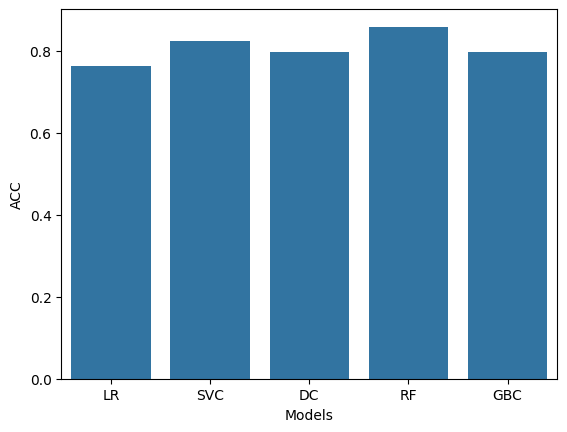

In [281]:
sns.barplot(x = final_result['Models'], y = final_result['ACC'])

In [279]:
final_result

,Models,ACC
0,LR,0.761456
1,SVC,0.824231
2,DC,0.797238
3,RF,0.858443
4,GBC,0.797238


In [282]:
final_result=pd.DataFrame({'Models':['LR','SVC','DC','RF','GBC'],'PRECISION':[precision_score(y_test,y_prediction),
                                                                         precision_score(y_test,y_prediction2),
                                                                         precision_score(y_test,y_prediction3),
                                                                         precision_score(y_test,y_prediction4),
                                                                         precision_score(y_test,y_prediction5)]})

<Axes: xlabel='Models', ylabel='PRECISION'>

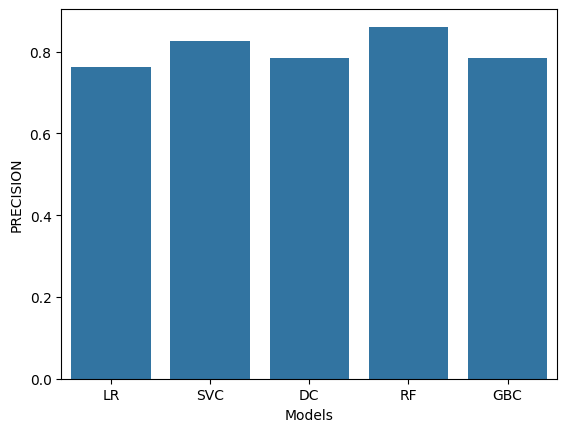

In [285]:
sns.barplot(x = final_result['Models'], y = final_result['PRECISION'])

In [284]:
final_result

,Models,PRECISION
0,LR,0.761724
1,SVC,0.826752
2,DC,0.784160
3,RF,0.861235
4,GBC,0.784160
